In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
    df = pd.read_csv(url)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully.


In [3]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
dtype: int64


In [7]:
df_kenya = df[df['location'] == 'Kenya']

In [8]:
df_kenya = df_kenya[['date', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'people_fully_vaccinated']]

In [9]:
df_kenya['date'] = pd.to_datetime(df_kenya['date'])

In [10]:
df_kenya.fillna(0, inplace=True)

In [11]:
print(df_kenya.describe())

                      date     new_cases   new_deaths    total_cases  \
count                 1674   1674.000000  1674.000000    1674.000000   
mean   2022-04-20 12:00:00    205.559140     3.398447  237047.882915   
min    2020-01-05 00:00:00      0.000000     0.000000       0.000000   
25%    2021-02-26 06:00:00      0.000000     0.000000  103993.000000   
50%    2022-04-20 12:00:00      0.000000     0.000000  323609.000000   
75%    2023-06-12 18:00:00      0.000000     0.000000  343312.000000   
max    2024-08-04 00:00:00  19023.000000   227.000000  344106.000000   
std                    NaN   1125.618882    17.989258  131389.050269   

       total_deaths  people_fully_vaccinated  
count   1674.000000             1.674000e+03  
mean    4079.434886             4.918764e+05  
min        0.000000             0.000000e+00  
25%     1817.000000             0.000000e+00  
50%     5649.000000             0.000000e+00  
75%     5688.000000             0.000000e+00  
max     5689.000000   

In [12]:
df_kenya['month'] = df_kenya['date'].dt.to_period('M')
monthly_avg_cases = df_kenya.groupby('month')['new_cases'].mean()
print(monthly_avg_cases.tail())

month
2024-04    0.000000
2024-05    0.000000
2024-06    0.133333
2024-07    0.032258
2024-08    0.000000
Freq: M, Name: new_cases, dtype: float64


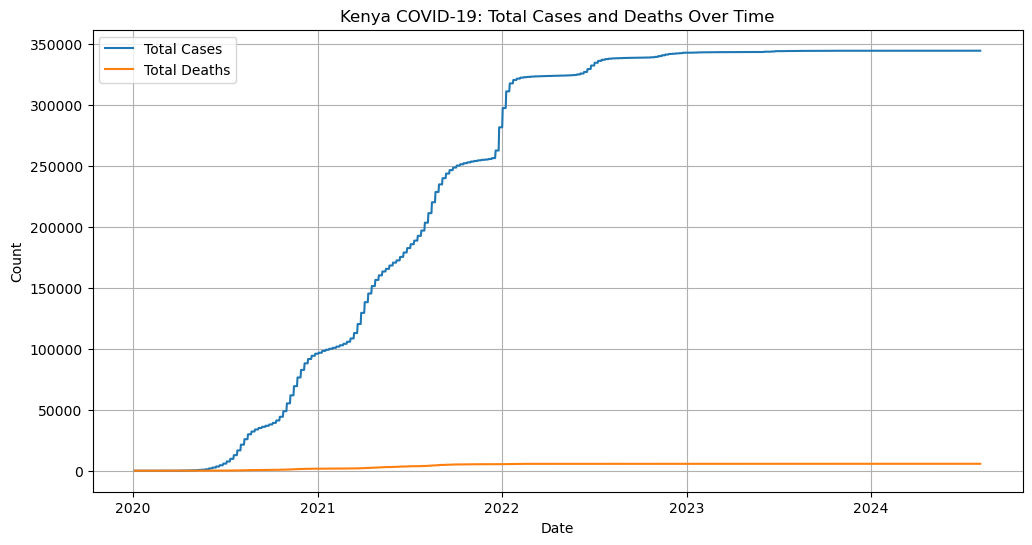

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_kenya['date'], df_kenya['total_cases'], label='Total Cases')
plt.plot(df_kenya['date'], df_kenya['total_deaths'], label='Total Deaths')
plt.title("Kenya COVID-19: Total Cases and Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

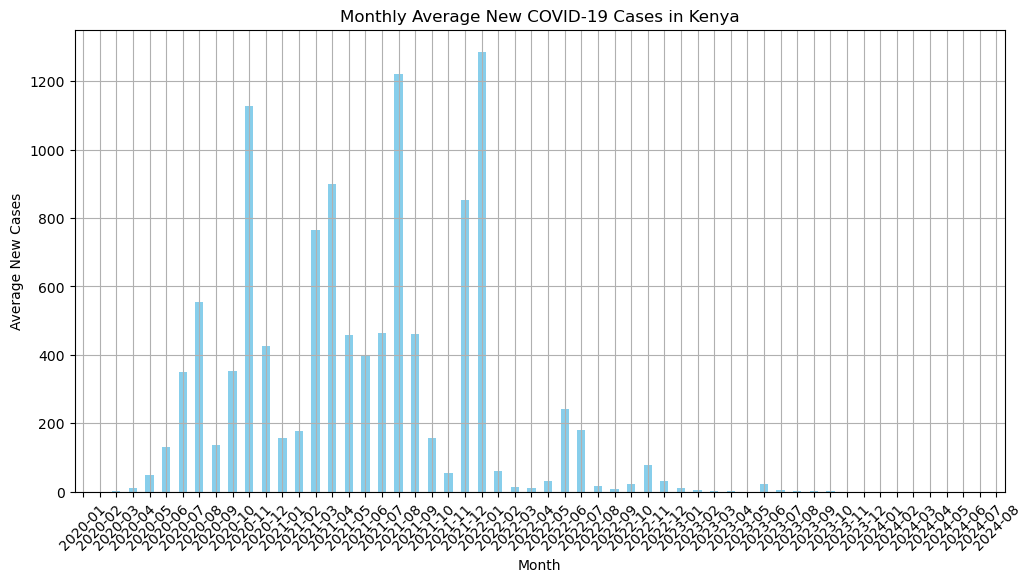

In [14]:
monthly_avg_cases.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Monthly Average New COVID-19 Cases in Kenya")
plt.xlabel("Month")
plt.ylabel("Average New Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

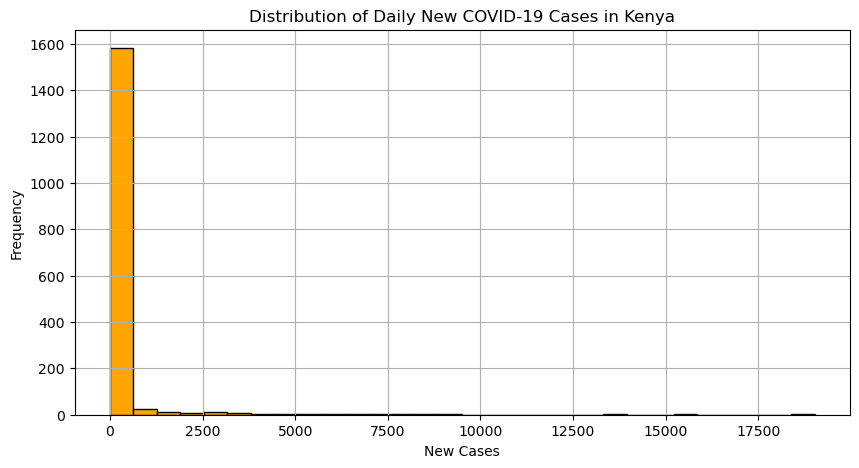

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df_kenya['new_cases'], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Daily New COVID-19 Cases in Kenya")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

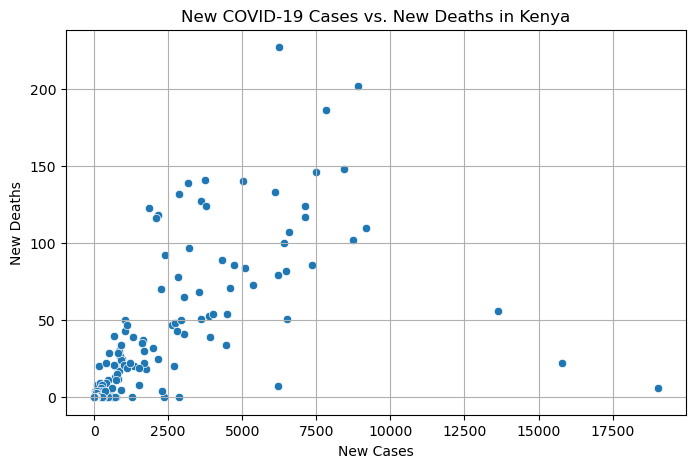

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_kenya, x='new_cases', y='new_deaths')
plt.title("New COVID-19 Cases vs. New Deaths in Kenya")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.grid(True)
plt.show()

In [18]:
print("Observations:")
print("- Most new COVID-19 cases in Kenya occurred in waves, visible in monthly averages.")
print("- There's a positive correlation between new cases and new deaths.")
print("- Some days had extremely high spikes, likely from backlogged reporting.")

Observations:
- Most new COVID-19 cases in Kenya occurred in waves, visible in monthly averages.
- There's a positive correlation between new cases and new deaths.
- Some days had extremely high spikes, likely from backlogged reporting.
